## Q1 code
### Qiaochen Sun
### Jinsong Yang

***In this code part, we start to get familiar with microfaune, a RNN-CNN machine learning model***

## Import modules and packages we need

In [11]:
import numpy as np
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as plt
import pylab
import IPython.display as ipd
from glob import glob
import os
import pickle
import csv
import tensorflow
import librosa.display
matplotlib.use('Agg') # No pictures displayed 

In [12]:
import microfaune
from microfaune.audio import load_wav, wav2spc, create_spec
from microfaune.plot import plot_spec

## Randomly download four wave files from xeno-canto website

In [38]:
# put four wave files into a list and the sounds are all from slender-billed
x = ['Slender_billed_Xenops1.wav','Slender_billed_Xenops2.wav','Slender_billed_Xenops3.wav','Slender_billed_Xenops4.wav']

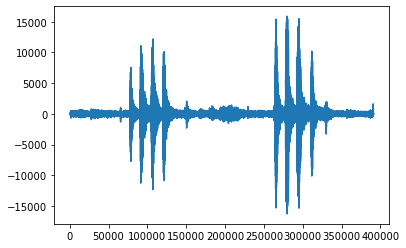

In [39]:
# show the plot of our wave file
fs1, data1 = load_wav('Slender_billed_Xenops1.wav')
plt.plot(data1)

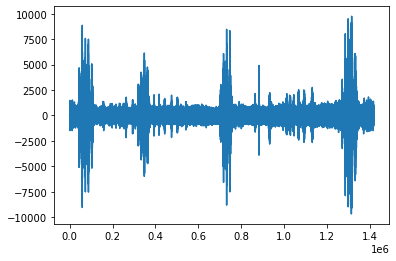

In [40]:
fs2, data2 = load_wav('Slender_billed_Xenops2.wav')
plt.plot(data2)

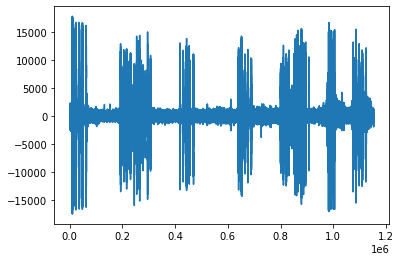

In [41]:
fs4, data4 = load_wav('Slender_billed_Xenops4.wav')
plt.plot(data4)


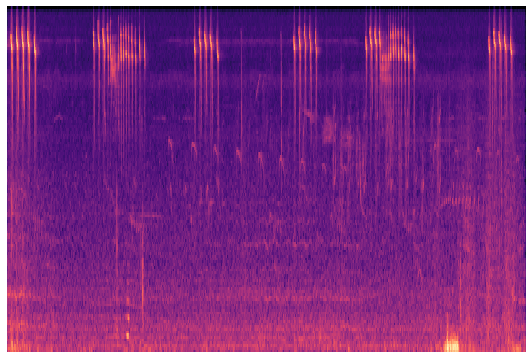

In [42]:
# # show the Mel Spectragram of our wave file
sig, fs = librosa.load('Slender_billed_Xenops4.wav')   
# make pictures name 
save_path = 'test.jpg'

pylab.axis('off') # no axis
pylab.axes([0, 0, 1.2, 1.2], frameon=False, xticks=[], yticks=[]) # Remove the white edge
S = librosa.feature.melspectrogram(y=sig, sr=fs)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)

Since our project is based on Mel spectragram, so we could generate it from our plot

In [141]:
spc = wav2spc("Slender_billed_Xenops4.wav")

In [142]:
# use microfaune to predict the global score and local score
from microfaune.detection import RNNDetector

detector = RNNDetector()

In [143]:
global_score = []
for i in x:
    glob, loc = detector.predict_on_wav(i)
    global_score.append(glob)
global_score

[array([0.8777194], dtype=float32),
 array([0.99038446], dtype=float32),
 array([0.9671296], dtype=float32),
 array([0.99264914], dtype=float32)]

From the result, we could see that most of audio's score are more than 0.95, which is pretty good. Because we choose these wave files from Xeno-canto and audio on this website have already been processed by some methods. Therefore, it's very normal to have higher global score. This is just the start code for our project, in next quarter, we will continue work on microfaune model and have a better understand of this model and our project.